# 1. Crawling / Scraping


###  Packages / Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
import pandas as pd
import numpy as np
import csv
import time
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_rows", None)
np.set_printoptions(suppress=True)

### functions section:

In [2]:
# this is a function for scraping the relevant data for an individual watch

def get_watch_details(driver):
    
# accept button click

    try:
        pop_up_clicker(driver,'//button[@class="btn btn-primary btn-full-width js-cookie-submit wt-consent-layer-accept-all"]',2)
    except Exception:
        pass 
    
# cancel button click

    try: 
        pop_up_clicker(driver,'//button[@class="btn btn-secondary flex-equal w-100-sm m-r-sm-5 js-close-modal"]',2)
    except Exception:
        pass
    
# main function

    watch_data={'Brand':None,'Model':None,'Price':None,'Year_Of_Production':None,'Condition':None,'Scope_Of_Delivery':None,
                'Movement':None,'Case_Material':None,'Bracelet_Material':None,
                'Bezel_Material':None,'Clasp_Material':None,'Crystal':None,'Number_Of_Jewels':None}  
    try:
        brand = driver.find_element(By.XPATH,'//tbody[1]/tr[3]/td[2]').text
        watch_data['Brand'] = brand
    except:
        pass
    try:
        model = driver.find_element(By.XPATH,'//tbody[1]/tr[4]/td[2]').text
        watch_data['Model'] = model
    except:
        pass
    try:
        price = driver.find_element(By.XPATH,'//span[@class="js-price-shipping-country"]').text
        watch_data['Price'] = price
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Year of production"]')
        parent = src.find_element(By.XPATH,'..')
        YOP = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Year_Of_Production'] = YOP
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Condition"]')
        parent = src.find_element(By.XPATH,'..')
        condition = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Condition'] = condition
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Scope of delivery"]')
        parent = src.find_element(By.XPATH,'..')
        SOD = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Scope_Of_Delivery'] = SOD
    except:
        pass      
    try:
        movement = driver.find_element(By.XPATH,'//tbody[2]/tr[2]/td[2]').text
        watch_data['Movement'] = movement
    except:
        pass
    try:
        case_material = driver.find_element(By.XPATH,'//tbody[3]/tr[2]/td[2]').text
        watch_data['Case_Material'] = case_material
    except:
        pass
    try:
        bracelet_material = driver.find_element(By.XPATH,'//tbody[4]/tr[2]/td[2]').text
        watch_data['Bracelet_Material'] = bracelet_material
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Bezel material"]')
        parent = src.find_element(By.XPATH,'..')
        bezel_material = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Bezel_Material'] = bezel_material
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Clasp material"]')
        parent = src.find_element(By.XPATH,'..')
        clasp_material = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Clasp_Material'] = clasp_material
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Crystal"]')
        parent = src.find_element(By.XPATH,'..')
        crystal = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Crystal'] = crystal
    except:
        pass
    try:
        src = driver.find_element(By.XPATH,'//strong[text()="Number of jewels"]')
        parent = src.find_element(By.XPATH,'..')
        NOJ = parent.find_element(By.XPATH,'following-sibling::*').text
        watch_data['Number_Of_Jewels'] = NOJ
    except:
        pass 
    
    return watch_data

In [3]:
# this function deals with the websites different pop-ups 
def pop_up_clicker(driver,xpath,seconds):
    button = WebDriverWait(driver, seconds).until(
            EC.presence_of_element_located((By.XPATH,xpath))).click()    

### Main Section:

In [51]:
# opening the website in incognito mode

PATH = Service("C:\Program Files (x86)\chromedriver.exe")
option = webdriver.ChromeOptions()
option.add_argument( "-incognito")
driver = webdriver.Chrome(service=PATH, options=option)
driver.get("https://www.chrono24.com/search/index.htm?currencyId=EUR&dosearch=true&gender=1401&manufacturerIds=112&manufacturerIds=118&manufacturerIds=124&manufacturerIds=127&manufacturerIds=18&manufacturerIds=187&manufacturerIds=188&manufacturerIds=192&manufacturerIds=193&manufacturerIds=194&manufacturerIds=236&manufacturerIds=245&manufacturerIds=265&manufacturerIds=30&manufacturerIds=32&manufacturerIds=34&manufacturerIds=43&manufacturerIds=438&maxAgeInDays=0&pageSize=60&priceFrom=40&redirectToSearchIndex=true&resultview=block&showpage=137&sortorder=0")

# clicking the accept button everytime the website pops up

try: 
    pop_up_clicker(driver,'//button[@class="btn btn-primary btn-full-width js-cookie-submit wt-consent-layer-accept-all"]',2)
except Exception:
    driver.quit()
    
watches_data =[]
pages = 137

#iterating over pages
while pages<=166:
    watches = driver.find_elements(By.XPATH,'//div[@class="article-item-image-container box-ratio-1-1 m-b-2"]')
# iterating over watches
    start = time.time()
    for watch in range(1,60):
        try:
            print(watch, end=" ")
            driver.execute_script("arguments[0].scrollIntoView();",watches[watch])
            watches[watch].click()
            data = get_watch_details(driver)
            watches_data.append(data)
            driver.back()
            watches = driver.find_elements(By.XPATH,'//div[@class="article-item-image-container box-ratio-1-1 m-b-2"]')
        except:
            print(f'an error occured while trying to click watch no. {watch}')
            watches = driver.find_elements(By.XPATH,'//div[@class="article-item-image-container box-ratio-1-1 m-b-2"]')
            pass
    stop = time.time()
    convert = time.strftime("%M:%S", time.gmtime(stop-start))
    print()
    print(f'time for page: {pages}, was: {convert}')
# moving to the next page
    pages = pages + 1
    next_button  = driver.find_element(By.XPATH,'//button[text()="\nNext"]')
    driver.execute_script("arguments[0].scrollIntoView();",next_button)
    next_button.click()
    print(f'currently working on page: {pages}')
    print('...')
# next page pop up click
    try:
        pop_up_clicker(driver,'//div[@class="btn btn-secondary flex-equal w-100-sm m-r-sm-5 js-close-modal"]',10)
        pop_up_clicker(driver,'//button[@class="btn btn-primary btn-full-width js-cookie-submit wt-consent-layer-accept-all"]',10)
    except Exception:
        pass
    
    
    


1 an error occured while trying to click watch no. 1
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
time for page: 137, was: 07:02
currently working on page: 138
...
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
time for page: 138, was: 06:59
currently working on page: 139
...
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
time for page: 139, was: 07:02
currently working on page: 140
...
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
time for page: 140, was: 07:06
currently working on page: 141
...
1 2 3 4 5

### saving the data to a csv file using pandas

In [4]:
df = pd.DataFrame.from_dict(watches_data)
df.to_csv('watches.csv',index=False,mode='a')

# 2. Data Cleaning and Handling 

In [2]:
df = pd.read_csv('watches.csv')
df.head()

,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
0,Perrelet,A1091/2,"$1,399",Unknown,"New (Brand new, without any signs of wear)","Original box, original papers",Automatic,Steel,Crocodile skin,NaN,NaN,Sapphire crystal,NaN
1,Rolex,Datejust 41,"$15,895",2021 (Approximation),"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Gold/Steel,Gold/Steel,Rose gold,Gold/Steel,Sapphire crystal,31
2,Patek Philippe,Perpetual Calendar Chronograph,"$285,000",Unknown,"New (Brand new, without any signs of wear)","Original box, original papers",Manual winding,Rose gold,Fold clasp,Rose gold,Rose Gold,Sapphire crystal,34
3,IWC,Pilot Spitfire Chronograph,"$15,500",2012,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Red gold,Crocodile skin,NaN,Rose Gold,Sapphire crystal,35
4,Rolex,Oyster Perpetual 36,"$16,999",2021,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Steel,Steel,Steel,Steel,Sapphire crystal,NaN


In [3]:
# basic info about the data
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22240 entries, 0 to 22239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               22239 non-null  object
 1   Model               22239 non-null  object
 2   Price               22238 non-null  object
 3   Year_Of_Production  22238 non-null  object
 4   Condition           21557 non-null  object
 5   Scope_Of_Delivery   22214 non-null  object
 6   Movement            22191 non-null  object
 7   Case_Material       21998 non-null  object
 8   Bracelet_Material   21193 non-null  object
 9   Bezel_Material      15037 non-null  object
 10  Clasp_Material      14291 non-null  object
 11  Crystal             17566 non-null  object
 12  Number_Of_Jewels    10641 non-null  object
dtypes: object(13)
memory usage: 2.2+ MB


,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
count,22239,22239,22238,22238,21557,22214,22191,21998,21193,15037,14291,17566,10641
unique,235,1887,5114,172,8,5,92,122,60,17,13,6,64
top,Rolex,Datejust 41,"$13,500",Unknown,Very good (Worn with little to no signs of wear),"Original box, original papers",Automatic,Steel,Steel,Steel,Steel,Sapphire crystal,31
freq,6064,1002,78,7334,9381,16525,18851,11505,6950,5501,8022,16974,3366


#### handling null and outlier fields and entries.
in this section i will :  
- get rid of entries with 8 or more null fields.
- get rid of outlier entries.
- fill null fields with the appropriate values to their variables.

In [4]:
# dropping null and entries.
df_clean = df.dropna(axis = 0 ,thresh = 6).copy()

# resetting the corrupt indexes.
df_clean = df_clean.reset_index(drop=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22229 entries, 0 to 22228
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               22229 non-null  object
 1   Model               22229 non-null  object
 2   Price               22229 non-null  object
 3   Year_Of_Production  22229 non-null  object
 4   Condition           21550 non-null  object
 5   Scope_Of_Delivery   22212 non-null  object
 6   Movement            22191 non-null  object
 7   Case_Material       21998 non-null  object
 8   Bracelet_Material   21193 non-null  object
 9   Bezel_Material      15037 non-null  object
 10  Clasp_Material      14291 non-null  object
 11  Crystal             17566 non-null  object
 12  Number_Of_Jewels    10641 non-null  object
dtypes: object(13)
memory usage: 2.2+ MB


 ## Data Exploration 
 
  in this section i will explore each column of the dataframe in order to find the best way to handle it.

In [5]:
print(df_clean['Brand'].describe())
print(df_clean['Brand'].unique())
print()
print(df_clean['Model'].describe())
print(df_clean['Model'].unique())
print()
print(df_clean['Condition'].describe())
print(df_clean['Condition'].unique())
print()
print(df_clean['Scope_Of_Delivery'].describe())
print(df_clean['Scope_Of_Delivery'].unique())
print()
print(df_clean['Movement'].describe())
print(df_clean['Movement'].unique())
print()
print(df_clean['Case_Material'].describe())
print(df_clean['Case_Material'].unique())
print()
print(df_clean['Bracelet_Material'].describe())
print(df_clean['Bracelet_Material'].unique())
print()
print(df_clean['Bezel_Material'].describe())
print(df_clean['Bezel_Material'].unique())
print()
print(df_clean['Clasp_Material'].describe())
print(df_clean['Clasp_Material'].unique())
print()
print(df_clean['Crystal'].describe())
print(df_clean['Crystal'].unique())

count     22229
unique      234
top       Rolex
freq       6061
Name: Brand, dtype: object
['Perrelet' 'Rolex' 'Patek Philippe' 'IWC' 'TAG Heuer' 'Ulysse Nardin'
 'Audemars Piguet' 'Tudor' 'Jaeger-LeCoultre' 'Corum' 'Girard Perregaux'
 'Parmigiani Fleurier' 'Richard Mille' 'Panerai' 'Breitling'
 'Christophe Claret' 'Franck Muller' 'Omega' 'Carl F. Bucherer' 'Chopard'
 'Cartier' 'Vacheron Constantin' 'Grand Seiko' 'Bovet' 'Blancpain'
 'Breguet' 'Roger Dubuis' 'Brand' 'Baume & Mercier' 'Glashütte Original'
 'H.Moser & Cie.' 'Zenith' 'A. Lange & Söhne' 'Bulgari' 'Greubel Forsey'
 'F.P.Journe' 'Jacob & Co.' 'Gérald Genta' 'Hublot' 'Seiko' 'Longines'
 'Piaget' 'Oris' 'Hermès' 'Romain Jerome' 'Mb&f' 'Bremont' 'Daniel Roth'
 'Bell & Ross' 'Louis Moinet' 'Maurice Lacroix' 'Montblanc' 'Hamilton'
 'Jaquet-Droz' 'Chronoswiss' 'Waltham' 'GHWGRMP' 'Dewitt' '177043.01P.A'
 'Milus' 'Harry Winston' 'Arnold & Son' '1996' 'Ebel' 'Louis Erard'
 '1-90-02-45-35-62' 'HD3' '1759SS' 'Paul Picot' 'Elgin' 'QP01

In [6]:
df_clean[df_clean['Condition'] == 'Condition']

,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
132,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
348,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
551,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
612,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
7293,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
12025,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
12287,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
14779,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
14941,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
18364,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels


here we can see that some entries in the dataframe has values that are the same as their column name.

i will remove them later in the Data Handling section.




In [7]:
df_clean[(df_clean['Movement']!= 'Automatic') & (df_clean['Movement']!= 'Quartz') & (df_clean['Movement']!= 'Manual winding')]

,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
78,Parmigiani Fleurier,PFH775-1005401-HA3131,"$37,450",Unknown,"New (Brand new, without any signs of wear)","Original box, original papers",28,Rose gold,Leather,NaN,NaN,NaN,28
85,Bovet,Dimier Récital,"$126,700",2011 (Approximation),Very good (Worn with little to no signs of wear),"Original box, original papers",DT7HS,Rose gold,Crocodile skin,Rose gold,Rose Gold,Sapphire crystal,NaN
108,Audemars Piguet,Royal Oak Chronograph,"$84,899",Unknown,Very good (Worn with little to no signs of wear),"Original papers, no original box",38 mm Try it on,Rubber,NaN,Rose gold,Rose Gold,Sapphire crystal,NaN
132,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
348,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
393,Patek Philippe,Calatrava,"$19,500",1958,Very good (Worn with little to no signs of wear),"No original box, no original papers",12-600,Yellow gold,NaN,NaN,NaN,NaN,NaN
510,Audemars Piguet,Royal Oak Offshore Chronograph,"$42,499",Unknown,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Steel,Rubber,NaN,Ceramic,Steel,Sapphire crystal,NaN
551,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
612,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
645,Glashütte Original,Senator Cosmopolite,"$31,750",2018,"Unworn (Mint condition, without signs of wear)","Original box, original papers",89-02,Red gold,Crocodile skin,NaN,Red gold,Sapphire crystal,NaN


In [8]:
df_clean[(df_clean['Case_Material']!='Steel') &(df_clean['Case_Material']!='Gold/Steel') &
         (df_clean['Case_Material']!='Rose gold') & (df_clean['Case_Material']!='Red gold') &
         (df_clean['Case_Material']!='Yellow gold') & (df_clean['Case_Material']!='White gold') &
         (df_clean['Case_Material']!='Bronze') & (df_clean['Case_Material']!='Titanium') &
        (df_clean['Case_Material']!='Carbon') & (df_clean['Case_Material']!='Platinum') &
        (df_clean['Case_Material']!='Ceramic') & (df_clean['Case_Material']!='Silver') &
        (df_clean['Case_Material']!='Tantalum') & (df_clean['Case_Material']!='Aluminum') &
        (df_clean['Case_Material']!='Palladium') & (df_clean['Case_Material']!='Plastic')].shape[0]

715

In [9]:
df_clean[(df_clean['Bracelet_Material']!='Crocodile skin') & (df_clean['Bracelet_Material']!='Gold/Steel') &
        (df_clean['Bracelet_Material']!='Steel') & (df_clean['Bracelet_Material']!='Rubber') &
        (df_clean['Bracelet_Material']!='Leather') & (df_clean['Bracelet_Material']!='Lizard skin') &
        (df_clean['Bracelet_Material']!='White gold') & (df_clean['Bracelet_Material']!='Rose gold') &
        (df_clean['Bracelet_Material']!='Yellow gold') & (df_clean['Bracelet_Material']!='Platinum') &
        (df_clean['Bracelet_Material']!='Textile') & (df_clean['Bracelet_Material']!='Silver') &
        (df_clean['Bracelet_Material']!='Titanium') & (df_clean['Bracelet_Material']!='Calf skin') &
        (df_clean['Bracelet_Material']!='Ceramic') & (df_clean['Bracelet_Material']!='Silicon') &
        (df_clean['Bracelet_Material']!='Shark skin') & (df_clean['Bracelet_Material']!='Red gold') &
        (df_clean['Bracelet_Material']!='Aluminum') & (df_clean['Bracelet_Material']!='Satin') &
        (df_clean['Bracelet_Material']!='Snake skin')].shape[0]

1842

these are entries that got filled with corrupt data, i will remove them in order to get a more reliable dataframe.

In [10]:
df_clean['Brand'].value_counts()

Rolex                           6061
Audemars Piguet                 2460
Patek Philippe                  2091
Breitling                       1747
Omega                           1649
Panerai                         1157
Cartier                         1083
IWC                              957
Tudor                            690
Jaeger-LeCoultre                 591
Hublot                           586
TAG Heuer                        305
Zenith                           287
Breguet                          224
Oris                             207
Richard Mille                    199
Vacheron Constantin              189
Parmigiani Fleurier              168
Bulgari                          137
A. Lange & Söhne                 124
Grand Seiko                      109
Blancpain                         65
Franck Muller                     61
Ulysse Nardin                     59
Girard Perregaux                  58
Chopard                           42
Glashütte Original                42
H

as we can see here, there are some brands with a lot of instances and there are some with less.
eventually i would like to get rid of the brands that has 50 or less instances.

## Data Handling

in this section i will get rid of oulier data and replace Nan fields with the most common value in the specific column.

In [11]:
# getting rid of the outlier entries.

df_clean = df_clean[df_clean['Condition'] != 'Condition']
df_clean = df_clean[(df_clean['Movement'] == 'Automatic') | (df_clean['Movement'] == 'Quartz') | (df_clean['Movement'] == 'Manual winding')]
df_clean = df_clean[(df_clean['Case_Material'] == 'Steel') | (df_clean['Case_Material'] == 'Gold/Steel') |
         (df_clean['Case_Material'] == 'Rose gold') | (df_clean['Case_Material'] == 'Red gold') |
         (df_clean['Case_Material'] == 'Yellow gold') | (df_clean['Case_Material'] == 'White gold') |
         (df_clean['Case_Material'] == 'Bronze') | (df_clean['Case_Material'] == 'Titanium') |
        (df_clean['Case_Material'] == 'Carbon') | (df_clean['Case_Material'] =='Platinum') |
        (df_clean['Case_Material'] == 'Ceramic') | (df_clean['Case_Material'] == 'Silver') |
        (df_clean['Case_Material'] == 'Tantalum') | (df_clean['Case_Material'] == 'Aluminum') |
        (df_clean['Case_Material'] == 'Palladium') | (df_clean['Case_Material'] == 'Plastic')]
df_clean = df_clean[(df_clean['Bracelet_Material'] == 'Crocodile skin') | (df_clean['Bracelet_Material'] == 'Gold/Steel') |
        (df_clean['Bracelet_Material'] == 'Steel') | (df_clean['Bracelet_Material'] == 'Rubber') |
        (df_clean['Bracelet_Material'] == 'Leather') | (df_clean['Bracelet_Material'] == 'Lizard skin') |
        (df_clean['Bracelet_Material'] == 'White gold') | (df_clean['Bracelet_Material'] == 'Rose gold') |
        (df_clean['Bracelet_Material'] == 'Yellow gold') | (df_clean['Bracelet_Material'] == 'Platinum') |
        (df_clean['Bracelet_Material'] == 'Textile') | (df_clean['Bracelet_Material'] == 'Silver') |
        (df_clean['Bracelet_Material'] == 'Titanium') | (df_clean['Bracelet_Material'] == 'Calf skin') |
        (df_clean['Bracelet_Material'] == 'Ceramic') | (df_clean['Bracelet_Material'] == 'Silicon') |
        (df_clean['Bracelet_Material'] == 'Shark skin') | (df_clean['Bracelet_Material'] == 'Red gold') |
        (df_clean['Bracelet_Material'] == 'Aluminum') | (df_clean['Bracelet_Material'] == 'Satin') |
        (df_clean['Bracelet_Material'] == 'Snake skin')]
# filling NaN and oulier fields with the most common value in the specific column.  

df_clean['Condition'] = df_clean['Condition'].fillna(df_clean['Condition'].mode()[0])
df_clean['Scope_Of_Delivery'] = df_clean['Scope_Of_Delivery'].fillna(df_clean['Scope_Of_Delivery'].mode()[0])
df_clean['Movement'] = df_clean['Movement'].fillna(df_clean['Movement'].mode()[0])
df_clean['Bezel_Material'] = df_clean['Bezel_Material'].fillna(df_clean['Bezel_Material'].mode()[0])
df_clean['Clasp_Material'] = df_clean['Clasp_Material'].fillna(df_clean['Clasp_Material'].mode()[0])
df_clean['Crystal'] = df_clean['Crystal'].fillna(df_clean['Crystal'].mode()[0])
df_clean['Number_Of_Jewels'] = df_clean['Number_Of_Jewels'].fillna(0)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20058 entries, 0 to 22227
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               20058 non-null  object
 1   Model               20058 non-null  object
 2   Price               20058 non-null  object
 3   Year_Of_Production  20058 non-null  object
 4   Condition           20058 non-null  object
 5   Scope_Of_Delivery   20058 non-null  object
 6   Movement            20058 non-null  object
 7   Case_Material       20058 non-null  object
 8   Bracelet_Material   20058 non-null  object
 9   Bezel_Material      20058 non-null  object
 10  Clasp_Material      20058 non-null  object
 11  Crystal             20058 non-null  object
 12  Number_Of_Jewels    20058 non-null  object
dtypes: object(13)
memory usage: 2.1+ MB


#### handling duplicate entries 
 - in this section i will get rid of any duplicated rows in the dataframe.

In [13]:
df_clean[df_clean.duplicated()].shape

(6030, 13)

In [14]:
df_clean = df_clean.drop_duplicates(keep = 'first')
df_clean.shape

(14028, 13)

#### removing outliers.

here i will get rid of:
 - brands that has 50 or less instances.
 - models that has 7 or less instances.
 in order to get a more reliable model, later in the Machine Learning section.

In [15]:
counts_brands = df_clean['Brand'].value_counts()
df_clean = df_clean[df_clean['Brand'].map(counts_brands) > 50]
print(df_clean['Brand'].value_counts())
counts_models = df_clean['Model'].value_counts()
df_clean = df_clean[df_clean['Model'].map(counts_models) > 7]
print(df_clean['Model'].value_counts())
print(df_clean.shape)

Rolex                  3868
Audemars Piguet        1434
Breitling              1157
Patek Philippe         1143
Omega                  1136
Cartier                 740
Panerai                 681
IWC                     592
Tudor                   450
Hublot                  397
Jaeger-LeCoultre        304
TAG Heuer               216
Zenith                  190
Oris                    146
Breguet                 141
Vacheron Constantin     117
Richard Mille           112
Bulgari                  91
Grand Seiko              79
A. Lange & Söhne         79
Parmigiani Fleurier      71
Blancpain                54
Name: Brand, dtype: int64
Datejust 41                                     574
Datejust 36                                     538
Daytona                                         463
Royal Oak Chronograph                           321
Submariner Date                                 303
Nautilus                                        282
Royal Oak Offshore Chronograph                

#### converting column datatypes and cleaning unwanted characters from strings 
in this section i will:
- get rid of unwanted characters in some columns. (for Example: the characters "," and "$" in the price column)
- convert column data types.

In [16]:
# handling price column
df_clean['Price'] = df_clean['Price'].str.replace("[$,]","",regex=True)
df_clean['Price'] = df_clean['Price'].astype(int)
df_clean['Price'].head()


1    15895
3    15500
4    16999
5    18000
6    32249
Name: Price, dtype: int32

In [17]:
# handling Year_Of_Production column 
df_clean['Year_Of_Production'] = df_clean['Year_Of_Production'].str.extract(pat='(\d+)', expand=False)
df_clean['Year_Of_Production'] = df_clean['Year_Of_Production'].fillna(df_clean.Year_Of_Production.median())
df_clean['Year_Of_Production'] = df_clean['Year_Of_Production'].astype(int)
df_clean.head()

,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels
1,Rolex,Datejust 41,15895,2021,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Gold/Steel,Gold/Steel,Rose gold,Gold/Steel,Sapphire crystal,31
3,IWC,Pilot Spitfire Chronograph,15500,2012,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Red gold,Crocodile skin,Steel,Rose Gold,Sapphire crystal,35
4,Rolex,Oyster Perpetual 36,16999,2021,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Steel,Steel,Steel,Steel,Sapphire crystal,0
5,Rolex,Sea-Dweller Deepsea,18000,2022,"New (Brand new, without any signs of wear)","Original box, original papers",Automatic,Steel,Steel,Ceramic,Steel,Sapphire crystal,31
6,Rolex,Yacht-Master 42,32249,2022,"New (Brand new, without any signs of wear)","Original box, original papers",Automatic,Yellow gold,Rubber,Yellow gold,Yellow gold,Sapphire crystal,31


In [18]:
# handling Number_Of_Jewels column
df_clean['Number_Of_Jewels'] = df_clean['Number_Of_Jewels'].astype(int)

creating a binned column for the Price column in order to try to classify it later in the machine learning section.

In [19]:
bins = [0,1000,5000,10000,20000,30000,40000,50000,100000,200000,300000,500000,4000000]
labels = ['0-1k','1k-5k','5k-10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-100k','100k-200k','200k-300k','300k-500k','500k<']
df_clean['Price_Binned'] = pd.cut(df_clean['Price'],bins,labels=labels)
df_clean.head()

,Brand,Model,Price,Year_Of_Production,Condition,Scope_Of_Delivery,Movement,Case_Material,Bracelet_Material,Bezel_Material,Clasp_Material,Crystal,Number_Of_Jewels,Price_Binned
1,Rolex,Datejust 41,15895,2021,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Gold/Steel,Gold/Steel,Rose gold,Gold/Steel,Sapphire crystal,31,10k-20k
3,IWC,Pilot Spitfire Chronograph,15500,2012,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Red gold,Crocodile skin,Steel,Rose Gold,Sapphire crystal,35,10k-20k
4,Rolex,Oyster Perpetual 36,16999,2021,"Unworn (Mint condition, without signs of wear)","Original box, original papers",Automatic,Steel,Steel,Steel,Steel,Sapphire crystal,0,10k-20k
5,Rolex,Sea-Dweller Deepsea,18000,2022,"New (Brand new, without any signs of wear)","Original box, original papers",Automatic,Steel,Steel,Ceramic,Steel,Sapphire crystal,31,10k-20k
6,Rolex,Yacht-Master 42,32249,2022,"New (Brand new, without any signs of wear)","Original box, original papers",Automatic,Yellow gold,Rubber,Yellow gold,Yellow gold,Sapphire crystal,31,30k-40k


In [20]:
# converting the rest of the columns to category data type 
cols_to_exclude = ['Price', 'Year_Of_Production', 'Number_Of_Jewels']
for col in df_clean.columns:
    if  col not in cols_to_exclude:
        df_clean[col] = df_clean[col].astype('category')

here i will set the correct order for each categorical column.

In [21]:
# Condition column
condition_order_list = ['Poor (Heavy signs of wear or scratches)','Fair (Obvious signs of wear or scratches)',
                       'Good (Light signs of wear or scratches)','Very good (Worn with little to no signs of wear)',
                       'New (Brand new, without any signs of wear)','Unworn (Mint condition, without signs of wear)']
df_clean["Condition"] = df_clean["Condition"].cat.set_categories(condition_order_list, ordered=True)
# Scope Of Delivery column
SOD_order_list = ['No original box, no original papers', 'Original box, no original papers','Original papers, no original box',
                 'Original box, original papers']
df_clean["Scope_Of_Delivery"] = df_clean["Scope_Of_Delivery"].cat.set_categories(SOD_order_list, ordered=True)
# Movement column
movement_order_list = ['Quartz','Manual winding','Automatic']
df_clean["Movement"] = df_clean["Movement"].cat.set_categories(movement_order_list, ordered=True)
# Clasp_Material column
clasp_order_list = ['Aluminum', 'Bronze', 'Gold/Steel', 'Plastic', 'Platinum', 'Red gold',
       'Rose Gold', 'Silver', 'Steel', 'Titanium', 'White Gold',
       'Yellow gold']
df_clean["Clasp_Material"] = df_clean["Clasp_Material"].cat.set_categories(clasp_order_list, ordered=True)
# Bezel and Case Material column
material_order_list = ['Aluminum', 'Bronze', 'Carbon', 'Ceramic', 'Gold/Steel', 'Palladium',
       'Plastic', 'Platinum', 'Red gold', 'Rose gold', 'Silver', 'Steel',
       'Tantalum', 'Titanium', 'White gold', 'Yellow gold']
df_clean["Bezel_Material"] = df_clean["Bezel_Material"].cat.set_categories(material_order_list, ordered=True)
df_clean["Case_Material"] = df_clean["Case_Material"].cat.set_categories(material_order_list, ordered=True)
# Bracelet Material column
bracelet_order_list = ['Calf skin', 'Ceramic', 'Crocodile skin', 'Gold/Steel', 'Leather',
       'Lizard skin', 'Platinum', 'Red gold', 'Rose gold', 'Rubber', 'Satin',
       'Shark skin', 'Silicon', 'Silver', 'Snake skin', 'Steel', 'Textile',
       'Titanium', 'White gold', 'Yellow gold']
df_clean["Bracelet_Material"] = df_clean["Bracelet_Material"].cat.set_categories(bracelet_order_list, ordered=True)
# Crystal column 
crystal_order_list = ['Glass', 'Plexiglass','Plastic', 'Mineral Glass','Sapphire crystal']
df_clean["Crystal"] = df_clean["Crystal"].cat.set_categories(crystal_order_list, ordered=True)

In [22]:
df_clean = df_clean.reset_index(drop=True)
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11373 entries, 0 to 11372
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Brand               11373 non-null  category
 1   Model               11373 non-null  category
 2   Price               11373 non-null  int32   
 3   Year_Of_Production  11373 non-null  int32   
 4   Condition           11373 non-null  category
 5   Scope_Of_Delivery   11373 non-null  category
 6   Movement            11373 non-null  category
 7   Case_Material       11373 non-null  category
 8   Bracelet_Material   11373 non-null  category
 9   Bezel_Material      11373 non-null  category
 10  Clasp_Material      11373 non-null  category
 11  Crystal             11373 non-null  category
 12  Number_Of_Jewels    11373 non-null  int32   
 13  Price_Binned        11373 non-null  category
dtypes: category(11), int32(3)
memory usage: 281.1 KB


,Price,Year_Of_Production,Number_Of_Jewels
count,11373.00,11373.00,11373.00
mean,39836.98,2018.12,17.89
std,96057.69,9.19,17.87
min,334.00,1937.00,0.00
25%,6875.00,2020.00,0.00
50%,14900.00,2021.00,23.00
75%,41500.00,2022.00,31.00
max,3400000.00,2030.00,257.00


# 3. EDA - Exploratory Data Analysis

In this section i will display some of the correlations between the columns using graphs and plots, in order to understand the data a little bit better.

this part is going to be useful later in the Machine Learning section.

## Number of watches by brand 

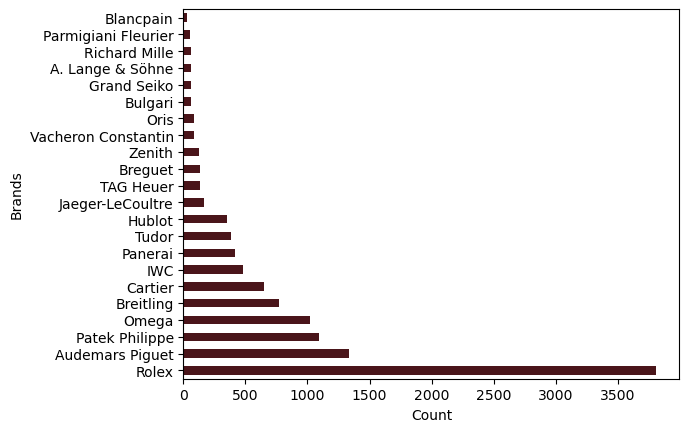

In [23]:
ax = df_clean['Brand'].value_counts().plot(kind = "barh" , color = "#4a151a")
ax.set_xlabel('Count')
ax.set_ylabel('Brands')
plt.show()

as we can see by this plot we have a significant amount of "Rolex" watches than any other brand.
i will look out for this in the model building section.

## Number of jewels 

 a plot that displays the number of watches, by jewel amount(excluding watches with over 80 jewels)   

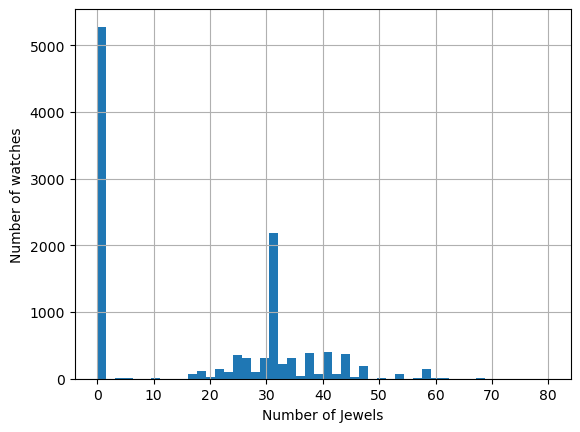

In [24]:
df_clean['Number_Of_Jewels'].hist( bins = 50, range = (0,80))
plt.xlabel('Number of Jewels')
plt.ylabel('Number of watches')
plt.show()

we can see that the number of watches with no jewels at all is fairly large.
also, there is a considerable amount of watches with over 30 jewels.
this might have an effect on the price column.

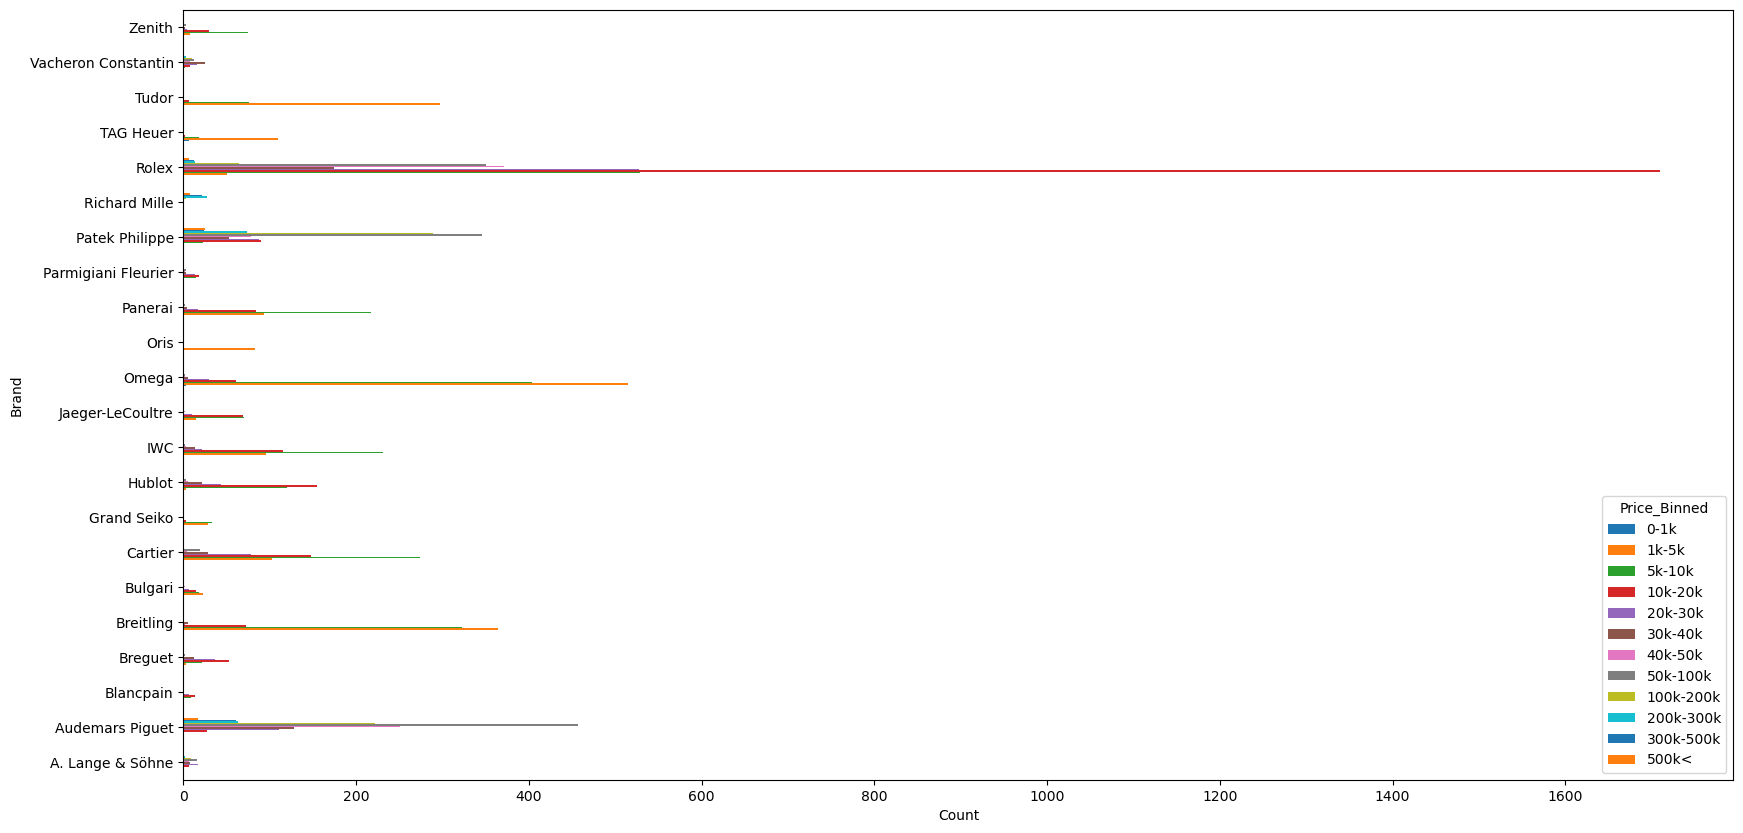

In [25]:
ct = pd.crosstab(df_clean['Brand'],df_clean['Price_Binned'])
ax = ct.plot(kind = 'barh', figsize = (20,10))
ax.set_xlabel('Count')
ax.set_ylabel('Brand')
plt.show()

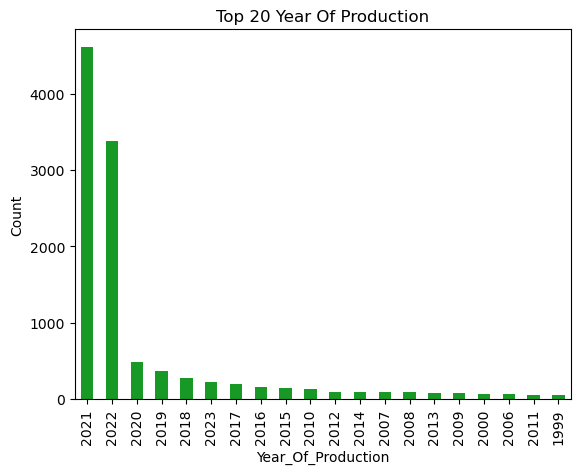

In [351]:
ax = df_clean['Year_Of_Production'].value_counts().head(20).plot(kind='bar',color = '#189925',title = 'Top 20 Year Of Production' )
ax.set_ylabel('Count')
ax.set_xlabel('Year_Of_Production')
plt.show()

from this plot we can see that most of the watches in our data set are relatively new (produced between the years of 2018 - 2023) 

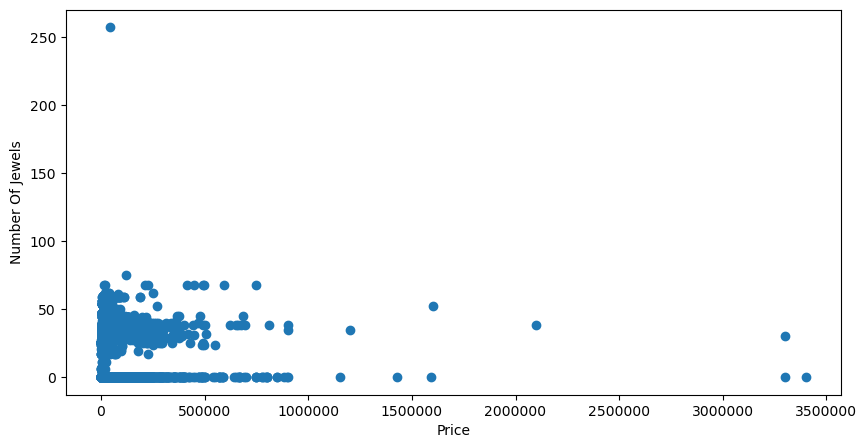

In [352]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.scatter(df_clean.Price,df_clean.Number_Of_Jewels)
plt.xlabel('Price')
plt.ylabel('Number Of Jewels')
ax.ticklabel_format(style='plain') # prevents matplotlib from displaying the price in a scientific notation. 
plt.show()

as we can see from this scatter plot, it doesn't seem that there is a direct correlation between the number of jewels and the price of the watch.
therefore there might be other variables that will have a direct effect on the price column. 


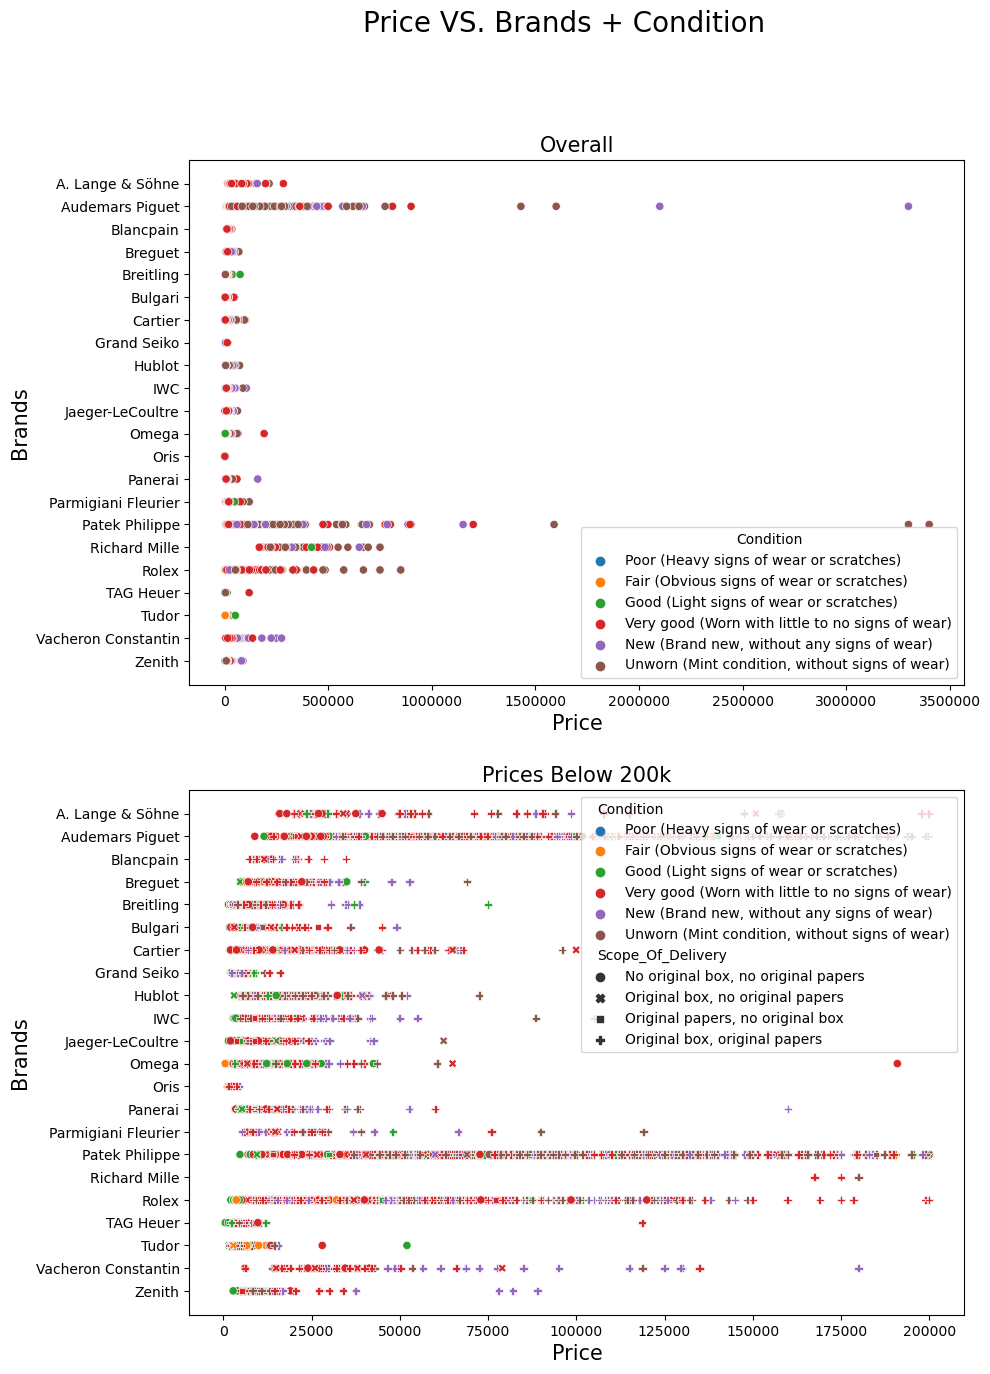

In [26]:
fig = plt.figure(figsize=(10,15))
fig1 = fig.add_subplot(2,1,1)
fig2 = fig.add_subplot(2,1,2)


sns.scatterplot(x = df_clean['Price'],y = df_clean['Brand'],hue = df_clean.Condition,ax= fig1)
sns.scatterplot(x = df_clean.Price[df_clean.Price<200000],y = df_clean.Brand[df_clean.Price<200000]
                ,hue = df_clean.Condition,style = df_clean.Scope_Of_Delivery, ax= fig2)

# legend location
#fig1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#fig2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# title and labels names
fig.suptitle('Price VS. Brands + Condition',fontsize = 20)
fig1.set_title('Overall',fontsize = 15)
fig1.set_xlabel('Price',fontsize = 15)
fig1.set_ylabel('Brands',fontsize = 15)

fig2.set_title('Prices Below 200k',fontsize = 15)
fig2.set_xlabel('Price',fontsize = 15)
fig2.set_ylabel('Brands',fontsize = 15)

# using regular numbers instead of scientific notation.
fig1.ticklabel_format(style='plain', axis='x',useOffset=False)

in the first subplot we can see that the brands with the most expensive watches are : Patek Philippe, Audemars Piguet, Rolex, and Richard Millie.
Also, there are some extremely expensive watches from the brands : Patek Philippe and Audemars Piguet. 
in the second subplot, we can see thatthe condition of the watch does have an effect on the price, we can see that watches with 'fair' condition or lower are generally priced lower than 'good'condition watches or higher.

## Pearson correlation coefficient 

In [354]:
df_clean[['Price','Year_Of_Production','Number_Of_Jewels']].corr()

,Price,Year_Of_Production,Number_Of_Jewels
Price,1.00,0.05,0.04
Year_Of_Production,0.05,1.00,0.08
Number_Of_Jewels,0.04,0.08,1.00


we can see the there is a positive correlation between the number of jewels and the Year Of Production column.
But, it doesn';t seem to have any effect on the Price column.

## Chi2 test 

here i tried thi chi2 test. 
my H0 was that the Model and the Price_Binned column are not correlated.
the result of p is 0.0 therefore i will accept H1 which means that they are correlated.

In [355]:
from scipy.stats import chi2_contingency
ct_model = pd.crosstab(df_clean['Model'],df_clean['Price_Binned'])
ct_model

Price_Binned,0-1k,1k-5k,5k-10k,10k-20k,20k-30k,30k-40k,40k-50k,50k-100k,100k-200k,200k-300k,300k-500k,500k<
Model,,,,,,,,,,,,
1815,0,0,0,2,7,1,1,7,3,0,0,0
1926,0,17,0,0,0,0,0,0,0,0,0,0
Air King,0,5,27,16,1,0,0,0,0,0,0,0
Annual Calendar,0,0,0,0,7,7,26,61,1,0,0,0
Annual Calendar Chronograph,0,0,0,0,0,0,0,40,11,0,0,0
Aquanaut,0,0,0,0,3,1,3,119,73,0,3,4
Aquaracer 300M,2,19,1,0,0,0,0,0,0,0,0,0
Aquatimer Automatic,0,5,5,0,0,0,0,0,0,0,0,0
Aquatimer Chronograph,0,13,11,1,0,0,0,0,0,0,0,0


In [356]:
chi2_contingency(ct_model)

(33947.0123933877,
 0.0,
 2882,
 array([[ 0.01661831,  3.30519652,  4.54049064, ...,  0.33605909,
          0.21788446,  0.10524927],
        [ 0.01345291,  2.67563528,  3.67563528, ...,  0.27204783,
          0.17638266,  0.08520179],
        [ 0.03877605,  7.71212521, 10.59447815, ...,  0.78413787,
          0.50839708,  0.24558164],
        ...,
        [ 0.06647323, 13.22078607, 18.16196254, ...,  1.34423635,
          0.87153785,  0.4209971 ],
        [ 0.01740965,  3.46258683,  4.75670448, ...,  0.3520619 ,
          0.22825991,  0.11026114],
        [ 0.04115009,  8.18429614, 11.24311967, ...,  0.83214631,
          0.53952343,  0.26061725]]))

In [357]:
ct_case = pd.crosstab(df_clean['Case_Material'],df_clean['Price_Binned'])
chi2_contingency(ct_case)

(5751.008651207529,
 0.0,
 165,
 array([[   0.00553944,    1.10173217,    1.51349688,    1.65382924,
            0.63334213,    0.29851402,    0.45238723,    0.75090126,
            0.37052669,    0.1120197 ,    0.07262815,    0.03508309],
        [   0.04668953,    9.28602831,   12.75661655,   13.93941792,
            5.33816935,    2.51604678,    3.81297811,    6.32902488,
            3.12301064,    0.94416601,    0.61215159,    0.29570034],
        [   0.07517805,   14.95207949,   20.54031478,   22.44482546,
            8.59535743,    4.05126176,    6.13954102,   10.19080278,
            5.02857645,    1.5202673 ,    0.98566781,    0.47612767],
        [   0.26114482,   51.93880243,   71.35056713,   77.96623582,
           29.85755737,   14.07280401,   21.32682669,   35.3996307 ,
           17.46768663,    5.28092851,    3.42389871,    1.65391717],
        [   0.61566869,  122.44966148,  168.21436736,  183.81130748,
           70.39145344,   33.17770157,   50.2796096 ,   83.45731118

The value of P here is also 0 which means that there is a correlation between the columns.

# 4. Supervised Learning

In this section i will use some methods of machine learning in order to try to predict the 'Price_Binned' column.

### Packages and Libraries

In [386]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.metrics import make_scorer

first thing to do is to transform all of the string columns in our data set to numeric values with the LabelEncoder method. 

In [401]:
new_df = df_clean.copy()
cols = ['Brand','Model','Case_Material','Bezel_Material','Clasp_Material',
        'Bracelet_Material','Movement','Crystal','Condition','Scope_Of_Delivery']
replace_map = {'0-1k':0,'1k-5k':1,'5k-10k':2,'10k-20k':3,'20k-30k':4,'30k-40k':5
                         ,'40k-50k':6,'50k-100k':7,'100k-200k':8,'200k-300k':9,'300k-500k':10,
               '500k<':11}
new_df['Price_Binned'].replace(replace_map,inplace=True)
for col in cols:
    new_df[col]=LabelEncoder().fit_transform(new_df[col])

#### splitting the data.

In [438]:
# splitting the data to X,y dataframes with the highly correlated columns

cols = ['Model','Brand','Case_Material','Bezel_Material','Clasp_Material','Bracelet_Material','Crystal','Movement']
X = new_df[cols].copy()
y = new_df['Price_Binned'].copy()
X.head(5)

,Model,Brand,Case_Material,Bezel_Material,Clasp_Material,Bracelet_Material,Crystal,Movement
0,70,17,4,9,2,3,4,0
1,162,9,8,11,6,2,4,0
2,148,17,11,11,8,15,4,0
3,211,17,11,3,8,15,4,0
4,261,17,15,15,11,9,4,0


In [439]:
y.head(5)

0    3
1    3
2    3
3    3
4    5
Name: Price_Binned, dtype: category
Categories (12, int64): [0 < 1 < 2 < 3 ... 8 < 9 < 10 < 11]

In [440]:
# train - test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## KNN - K Nearest Neighbors.

In [448]:
# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

parameters = {'n_neighbors': range(1,25,2)}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, scoring = make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('The best parameter set is: ',clf.best_params_,'and its Accuracy score was', clf.best_score_)
print('confusion matrix:')
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))

The best parameter set is:  {'n_neighbors': 5} and its Accuracy score was 0.618891932985707
confusion matrix:
[[  0   2   0   1   0   0   0   0   0   0   0   0]
 [  0 440  87   4   5   0   0   2   0   0   0   0]
 [  0 113 507  98  11   3   0   2   0   0   0   0]
 [  0  19 174 570  42   2  14   6   0   2   0   0]
 [  0   3  37  98 114  25  13   5   3   0   0   0]
 [  0   5   6  16  30  44  19  10   2   1   0   0]
 [  0   2   3  12  11  29  98  62   3   0   0   1]
 [  0   2   6   8  11  25  45 196  44   4   0  15]
 [  1   2   1   3   7   5   3  47 109  15   2   3]
 [  0   0   0   0   0   0   0   9  15  29   2   1]
 [  0   0   0   1   2   0   1   5  10   5   3   5]
 [  0   0   0   0   0   0   0   4   4   0   4   2]]


as we can see we've got an accuracy score of : 0.61 which is not particularly reliable.
let's try another model.

## Decision Tree 

In [456]:
dt = tree.DecisionTreeClassifier()
clf_dt = dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)

print('confusion matrix:')
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))
print('Accuracy: ',metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

confusion matrix:
[[  0   3   0   0   0   0   0   0   0   0   0   0]
 [  1 454  70  11   0   0   2   0   0   0   0   0]
 [  0 126 496 103   3   3   1   2   0   0   0   0]
 [  0  16 113 627  46  17   4   4   0   2   0   0]
 [  0   4  14 103 131  26   7   9   3   1   0   0]
 [  0   0   4   9  38  43  23  12   0   2   2   0]
 [  0   0   0   4  17  19 114  65   1   0   1   0]
 [  0   0   5   9  15   8  49 245  22   2   1   0]
 [  0   1   0   4   5   6   6  50 113   8   5   0]
 [  0   0   0   0   0   0   0   3  24  24   3   2]
 [  0   0   0   0   1   1   1   3   7   5   9   5]
 [  0   0   0   0   0   2   0   2   4   0   5   1]]
Accuracy:  0.6614888628370457


this model has generated a better accuracy score than the last model but it is still pretty low.

## Naive Bayes 

In [457]:
nb=GaussianNB()
nb=nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print('confusion matrix:')
print(metrics.confusion_matrix(y_true=y_test,y_pred=y_pred))
print('Accuracy: ',metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

confusion matrix:
[[  1   2   0   0   0   0   0   0   0   0   0   0]
 [394  13   0   5   1   0  17   0  48   0  45  15]
 [449  18   6   5   2   0   7   0 153   0  54  40]
 [191  30   4 106   4   0  15   0 316   0 108  55]
 [ 66  14   3  47   2   0  12   0 129   0  23   2]
 [ 34   4   1   5   0   0  13   0  55   0  17   4]
 [ 52   1   2   1   0   0  48   0  95   0  21   1]
 [ 86   9   5   3   0   0  35   0 193   0  21   4]
 [ 52   3   1  10   2   0   6   0 114   0   9   1]
 [  4   0   2   0   0   0   0   0  43   0   5   2]
 [  3   0   1   0   0   0   1   0  16   0  10   1]
 [  3   0   0   1   0   0   0   0   9   0   1   0]]
Accuracy:  0.08792497069167643


this model has generated the lowest score out of the 3 model. 

#                                                 Summary


- in this project i tried to predict the price of watches based on different attributes of similar watches.
- as i was working on the EDA part of the project, i started to see that it was pretty hard to find a correlation between the different variables, which got me worried towards the machine learning part.
- in the machine learning section i tried different models and tried to manipulate them in order to get a higher score but to no avail.
- In conclusion, it is practicly impossible to predict the price of watches, using the variables that i used in this project.
- maybe in the futur, i will try again, with more quality variables.